## 加载训练集数据

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [5]:
content = pd.read_csv('D:/Machine Learning/NLP/data/titanic/train.csv')
content = content.dropna()
age_with_fares = content[(content['Age']>22)&(content['Fare']<400)&(content['Fare']>130)]
sub_fare = age_with_fares['Fare']
sub_age = age_with_fares['Age']

In [3]:
sub_fare

88     263.0000
118    247.5208
195    146.5208
268    153.4625
269    135.6333
299    247.5208
318    164.8667
319    134.5000
325    135.6333
332    153.4625
337    134.5000
341    263.0000
377    211.5000
438    263.0000
498    151.5500
609    153.4625
716    227.5250
730    211.3375
779    211.3375
Name: Fare, dtype: float64

In [4]:
sub_age

88     23.0
118    24.0
195    58.0
268    58.0
269    35.0
299    50.0
318    31.0
319    40.0
325    36.0
332    38.0
337    41.0
341    24.0
377    27.0
438    64.0
498    25.0
609    40.0
716    38.0
730    29.0
779    43.0
Name: Age, dtype: float64

## 机器学习模型定义

In [6]:
def func(age, k, b):
    return k * age + b

## 损失函数定义

In [7]:
def loss(y, yhat):
    return np.mean(np.abs(y-yhat))

## 1. Random Choose Method to get optimal k and b

### 超参数定义

In [17]:
loop_times = 10000

### 模型训练

after 0 loops, the current loss is 447.800527833723
after 1 loops, the current loss is 189.6974320684902
after 3 loops, the current loss is 116.72250427486216
after 5 loops, the current loss is 91.71261352113291
after 6 loops, the current loss is 78.88058969526078
after 9 loops, the current loss is 61.26480480293088
after 1103 loops, the current loss is 61.23288316920328
after 3940 loops, the current loss is 61.214005217762086
after 5385 loops, the current loss is 61.15817549848727
after 7204 loops, the current loss is 61.00980846084051


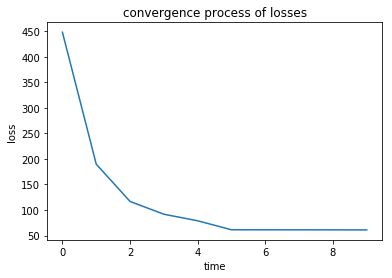

In [18]:

best_k, best_b = None, None
min_error_rate = float('inf')

losses = []

while loop_times > 0:

    k_hat, b_hat = random.random() * 20 - 10, random.random() * 20 - 10
    estimated_fares = func(sub_age, k_hat, b_hat)
    error_rate = loss(sub_fare, estimated_fares)

    if error_rate < min_error_rate:
        min_error_rate = error_rate
        best_k, best_b = k_hat, b_hat
        print('after {} loops, the current loss is {}'.format(10000-loop_times, error_rate))
        losses.append(error_rate)
    loop_times -= 1


# 画图观察loss的收敛过程
plt.title('convergence process of losses')
plt.xlabel('time')
plt.ylabel('loss')
plt.plot(range(len(losses)), losses)
plt.show()

## 2. Supervised Direction to get optimal k and b

after 0 loops, the current loss is 192.7430500652394
after 3 loops, the current loss is 176.71431933926286
after 4 loops, the current loss is 157.12504843988017
after 5 loops, the current loss is 138.24058808311008
after 6 loops, the current loss is 126.76704285813786
after 7 loops, the current loss is 111.06791625338847
after 8 loops, the current loss is 107.54592156914201
after 9 loops, the current loss is 87.80728561320291
after 10 loops, the current loss is 80.98240888237513
after 11 loops, the current loss is 77.59468054732312
after 12 loops, the current loss is 65.49724030229318
after 13 loops, the current loss is 65.41909843289808
after 14 loops, the current loss is 61.8312416906329
after 18 loops, the current loss is 61.81492889480436
after 21 loops, the current loss is 61.677183719916286
after 69 loops, the current loss is 61.656078875474456
after 88 loops, the current loss is 61.59753856902933
after 94 loops, the current loss is 61.563076177742005
after 104 loops, the current

after 5755 loops, the current loss is 52.20584877076252
after 5782 loops, the current loss is 52.13719551754854
after 5784 loops, the current loss is 51.99763982419167
after 5823 loops, the current loss is 51.91926471438313
after 5891 loops, the current loss is 51.898557313722
after 5908 loops, the current loss is 51.82876708393376
after 5941 loops, the current loss is 51.76570954446925
after 5952 loops, the current loss is 51.73086124234876
after 5964 loops, the current loss is 51.69867645525409
after 5978 loops, the current loss is 51.69286259729845
after 5984 loops, the current loss is 51.670594430510825
after 5988 loops, the current loss is 51.58716508024139
after 5990 loops, the current loss is 51.57498736052213
after 6008 loops, the current loss is 51.48437427218904
after 6013 loops, the current loss is 51.421497368548216
after 6043 loops, the current loss is 51.30040198149505
after 6104 loops, the current loss is 51.23845168493133
after 6105 loops, the current loss is 51.1695450

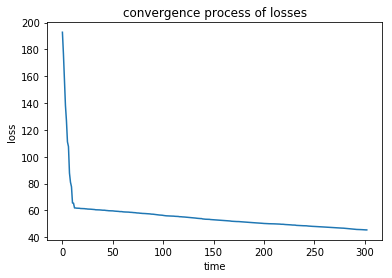

In [73]:
loop_times = 10000

change_directions = [(-1,-1),(-1,1),(1,-1),(1,1)]
direction = random.choice(change_directions)

def step():
    return random.random() * 1

new_k, new_b = random.random() * 20 - 10, random.random() * 20 - 10
best_k, best_b = random.random() * 20 - 10, random.random() * 20 - 10

min_error_rate = float('inf')
losses = []

while loop_times > 0:

    k_delta_direction, b_delta_direction = direction
    k_delta, b_delta = k_delta_direction * step(), b_delta_direction * step()    # optimizer
#     new_k, new_b = new_k + k_delta, new_b + b_delta
    new_k, new_b = best_k + k_delta, best_b + b_delta

    estimated_fares = func(sub_age, new_k, new_b)
    error_rate = loss(sub_fare, estimated_fares)    # 计算loss

    if error_rate < min_error_rate:
        min_error_rate = error_rate
        best_k, best_b = new_k, new_b
        print('after {} loops, the current loss is {}'.format(10000-loop_times, error_rate))
        losses.append(error_rate)
    else:
        direction = random.choice(list(set(change_directions) - {(k_delta_direction, b_delta_direction)}))
    

    loop_times -= 1


# 画图观察loss的收敛过程
plt.title('convergence process of losses')
plt.xlabel('time')
plt.ylabel('loss')
plt.plot(range(len(losses)), losses)
plt.show()

## 3. Gradient Descent to get optimal k and b

after 0 loops, the current loss is 70.40649106329352
after 1 loops, the current loss is 64.98079608423372
after 9 loops, the current loss is 64.38213464515191
after 25 loops, the current loss is 64.1095584678666
after 49 loops, the current loss is 64.05803492216029
after 73 loops, the current loss is 64.00651137645394
after 97 loops, the current loss is 63.954987830747626
after 121 loops, the current loss is 63.903464285041295
after 145 loops, the current loss is 63.85194073933497
after 169 loops, the current loss is 63.80041719362864
after 193 loops, the current loss is 63.7488936479223
after 217 loops, the current loss is 63.69737010221596
after 241 loops, the current loss is 63.645846556509646
after 265 loops, the current loss is 63.59432301080331
after 393 loops, the current loss is 63.55775791385063
after 417 loops, the current loss is 63.506234368144305
after 441 loops, the current loss is 63.45471082243797
after 483 loops, the current loss is 63.401525226870206
after 579 loops, 

after 2417 loops, the current loss is 57.342245635180845
after 2421 loops, the current loss is 57.33393538587338
after 2425 loops, the current loss is 57.32562513656589
after 2429 loops, the current loss is 57.31731488725841
after 2433 loops, the current loss is 57.30900463795094
after 2437 loops, the current loss is 57.30069438864346
after 2441 loops, the current loss is 57.29238413933598
after 2445 loops, the current loss is 57.2840738900285
after 2449 loops, the current loss is 57.27576364072102
after 2453 loops, the current loss is 57.267453391413554
after 2457 loops, the current loss is 57.25914314210606
after 2461 loops, the current loss is 57.250832892798584
after 2465 loops, the current loss is 57.24252264349112
after 2469 loops, the current loss is 57.23421239418363
after 2473 loops, the current loss is 57.22590214487615
after 2477 loops, the current loss is 57.21759189556869
after 2481 loops, the current loss is 57.209281646261196
after 2485 loops, the current loss is 57.2009

after 3264 loops, the current loss is 55.86662236648298
after 3268 loops, the current loss is 55.85831211717549
after 3272 loops, the current loss is 55.85000186786801
after 3276 loops, the current loss is 55.841691618560546
after 3280 loops, the current loss is 55.83338136925307
after 3284 loops, the current loss is 55.82507111994559
after 3288 loops, the current loss is 55.81676087063811
after 3292 loops, the current loss is 55.808450621330635
after 3296 loops, the current loss is 55.80014037202316
after 3300 loops, the current loss is 55.79183012271568
after 3304 loops, the current loss is 55.7835198734082
after 3308 loops, the current loss is 55.77520962410072
after 3312 loops, the current loss is 55.76689937479324
after 3316 loops, the current loss is 55.758589125485756
after 3320 loops, the current loss is 55.75027887617828
after 3324 loops, the current loss is 55.741968626870786
after 3328 loops, the current loss is 55.73365837756333
after 3332 loops, the current loss is 55.7253

after 3887 loops, the current loss is 54.85637305900389
after 3891 loops, the current loss is 54.84806280969642
after 3895 loops, the current loss is 54.83975256038894
after 3899 loops, the current loss is 54.831442311081446
after 3903 loops, the current loss is 54.82313206177399
after 3907 loops, the current loss is 54.814821812466505
after 3911 loops, the current loss is 54.80651156315901
after 3915 loops, the current loss is 54.79820131385156
after 3919 loops, the current loss is 54.789891064544065
after 3923 loops, the current loss is 54.78158081523658
after 3927 loops, the current loss is 54.77327056592911
after 3931 loops, the current loss is 54.76496031662163
after 3935 loops, the current loss is 54.75665006731415
after 3939 loops, the current loss is 54.74833981800666
after 3943 loops, the current loss is 54.740029568699185
after 3947 loops, the current loss is 54.73171931939171
after 3951 loops, the current loss is 54.72340907008422
after 3955 loops, the current loss is 54.715

after 4734 loops, the current loss is 53.211774721054034
after 4780 loops, the current loss is 53.209277252013194
after 4784 loops, the current loss is 53.2065071689107
after 4788 loops, the current loss is 53.2037370858082
after 4792 loops, the current loss is 53.200967002705724
after 4796 loops, the current loss is 53.19819691960322
after 4800 loops, the current loss is 53.19542683650074
after 4804 loops, the current loss is 53.19265675339824
after 4808 loops, the current loss is 53.18988667029575
after 4812 loops, the current loss is 53.187116587193245
after 4816 loops, the current loss is 53.18434650409076
after 4820 loops, the current loss is 53.18157642098827
after 4824 loops, the current loss is 53.17880633788577
after 4828 loops, the current loss is 53.17603625478328
after 4832 loops, the current loss is 53.17326617168079
after 4836 loops, the current loss is 53.17049608857829
after 4840 loops, the current loss is 53.1677260054758
after 4844 loops, the current loss is 53.164955

after 7149 loops, the current loss is 50.42534812825668
after 7156 loops, the current loss is 50.41454480415695
after 7163 loops, the current loss is 50.40374148005722
after 7170 loops, the current loss is 50.392938155957495
after 7177 loops, the current loss is 50.382134831857776
after 7184 loops, the current loss is 50.37133150775804
after 7191 loops, the current loss is 50.36175924893562
after 7273 loops, the current loss is 50.35831211717632
after 7280 loops, the current loss is 50.34750879307661
after 7287 loops, the current loss is 50.33670546897688
after 7294 loops, the current loss is 50.32590214487715
after 7301 loops, the current loss is 50.315098820777415
after 7308 loops, the current loss is 50.30429549667772
after 7315 loops, the current loss is 50.29349217257798
after 7322 loops, the current loss is 50.28268884847825
after 7329 loops, the current loss is 50.27188552437855
after 7336 loops, the current loss is 50.261082200278814
after 7343 loops, the current loss is 50.250

after 9164 loops, the current loss is 48.64467080818472
after 9185 loops, the current loss is 48.62444920153653
after 9201 loops, the current loss is 48.61669296884954
after 9222 loops, the current loss is 48.596471362201356
after 9243 loops, the current loss is 48.57624975555317
after 9259 loops, the current loss is 48.56849352286619
after 9280 loops, the current loss is 48.54827191621798
after 9296 loops, the current loss is 48.54051568353101
after 9299 loops, the current loss is 48.536151452356634
after 9317 loops, the current loss is 48.52029407688281
after 9333 loops, the current loss is 48.512537844195855
after 9336 loops, the current loss is 48.499863363714
after 9354 loops, the current loss is 48.49231623754764
after 9357 loops, the current loss is 48.48684397313229
after 9370 loops, the current loss is 48.48456000486067
after 9373 loops, the current loss is 48.46357527507134
after 9394 loops, the current loss is 48.450555884489646
after 9410 loops, the current loss is 48.43525

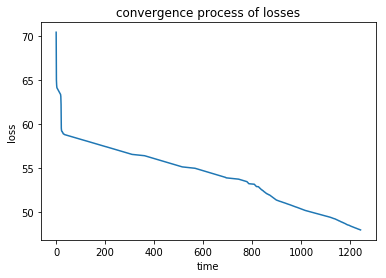

In [76]:
loop_times = 10000

def derivate(y, yhat, x):
    abs_values = [1 if (y_i - yhat_i) > 0 else -1 for y_i, yhat_i in zip(y, yhat)]
    return np.mean([a * -x_i for a, x_i in zip(abs_values, x)])
def derivate_b(y, yhat):
    abs_values = [1 if (y_i - yhat_i) > 0 else -1 for y_i, yhat_i in zip(y, yhat)]
    return np.mean([a * -1 for a in abs_values])

learning_rate = 1e-1

k_hat, b_hat = random.random() * 20 - 10, random.random() * 20 - 10
losses = []
min_error_rate = float('inf')

while loop_times > 0:

    k_delta, b_delta = -1 * learning_rate * derivate(sub_fare, func(sub_age,k_hat,b_hat),sub_age), -1 * learning_rate * derivate_b(sub_fare, func(sub_age, k_hat, b_hat))
    k_hat, b_hat = k_hat + k_delta, b_hat + b_delta

    estimated_fares = func(sub_age, k_hat, b_hat)
    error_rate = loss(sub_fare, estimated_fares)

    if error_rate < min_error_rate:
        min_error_rate = error_rate
        best_k, best_b = k_hat, b_hat
        print('after {} loops, the current loss is {}'.format(10000-loop_times, error_rate))
        losses.append(error_rate)

    loop_times -= 1

    
# 画图观察loss的收敛过程
plt.title('convergence process of losses')
plt.xlabel('time')
plt.ylabel('loss')
plt.plot(range(len(losses)), losses)
plt.show()